<a href="https://colab.research.google.com/github/fpluasn/Saturdays.AIGyeML/blob/master/DetectObject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print ("Instalación de la libreria FastAI...")
!pip install fastai==0.7.0
print ("Instalación de la libreria TorhText...")
!pip install torchtext==0.2.3

Instalación de la libreria FastAI...
    100% |████████████████████████████████| 122kB 4.6MB/s 
    100% |████████████████████████████████| 1.5MB 15.8MB/s 
    100% |████████████████████████████████| 496.4MB 35kB/s 
    100% |████████████████████████████████| 3.6MB 4.5MB/s 
    100% |████████████████████████████████| 61kB 6.6MB/s 
    100% |████████████████████████████████| 48.5MB 1.1MB/s 
    100% |████████████████████████████████| 81kB 20.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built bcolz feather-format
  Found existing installation: torch 1.0.1.post2
    Uninstalling torch-1.0.1.post2:
      Successfully uninstalled torch-1.0.1.post2
  Found existing installation: fastai 1.0.51
    Uninstalling fastai-1.0.51:
      Successfully uninstalled fastai-1.0.51
Instalación de la libreria TorhText...

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
torch.cuda.set_device(0) #Configuración del uso de GPU
import os

In [0]:
os.mkdir('/content/data')
os.mkdir('/content/data/pascal')
os.mkdir('/content/data/pascal/tmp')
os.mkdir('/content/data/pascal/models')
os.mkdir('/content/data/pascal/src')
PATH = Path('/content/data/pascal')
#Realizar carga de Datos

In [6]:
list(PATH.iterdir())

[PosixPath('/content/data/pascal/pascal_test2007.json'),
 PosixPath('/content/data/pascal/src'),
 PosixPath('/content/data/pascal/pascal_train2012.json'),
 PosixPath('/content/data/pascal/tmp'),
 PosixPath('/content/data/pascal/pascal_val2007.json'),
 PosixPath('/content/data/pascal/.ipynb_checkpoints'),
 PosixPath('/content/data/pascal/pascal_train2007.json'),
 PosixPath('/content/data/pascal/VOCtrainval_06-Nov-2007.tar'),
 PosixPath('/content/data/pascal/pascal_val2012.json'),
 PosixPath('/content/data/pascal/models')]

In [72]:
!tar -xvf '/content/data/pascal/VOCtest_06-Nov-2007.tar'

VOCdevkit/
VOCdevkit/VOC2007/
VOCdevkit/VOC2007/Annotations/
VOCdevkit/VOC2007/Annotations/000001.xml
VOCdevkit/VOC2007/Annotations/000002.xml
VOCdevkit/VOC2007/Annotations/000003.xml
VOCdevkit/VOC2007/Annotations/000004.xml
VOCdevkit/VOC2007/Annotations/000006.xml
VOCdevkit/VOC2007/Annotations/000008.xml
VOCdevkit/VOC2007/Annotations/000010.xml
VOCdevkit/VOC2007/Annotations/000011.xml
VOCdevkit/VOC2007/Annotations/000013.xml
VOCdevkit/VOC2007/Annotations/000014.xml
VOCdevkit/VOC2007/Annotations/000015.xml
VOCdevkit/VOC2007/Annotations/000018.xml
VOCdevkit/VOC2007/Annotations/000022.xml
VOCdevkit/VOC2007/Annotations/000025.xml
VOCdevkit/VOC2007/Annotations/000027.xml
VOCdevkit/VOC2007/Annotations/000028.xml
VOCdevkit/VOC2007/Annotations/000029.xml
VOCdevkit/VOC2007/Annotations/000031.xml
VOCdevkit/VOC2007/Annotations/000037.xml
VOCdevkit/VOC2007/Annotations/000038.xml
VOCdevkit/VOC2007/Annotations/000040.xml
VOCdevkit/VOC2007/Annotations/000043.xml
VOCdevkit/VOC2007/Annotations/000045.

In [71]:
!tar -xvf '/content/data/pascal/VOCtrainval_06-Nov-2007.tar'


tar: This does not look like a tar archive
tar: Skipping to next header
VOCdevkit/VOC2007/JPEGImages/004269.jpg
VOCdevkit/VOC2007/JPEGImages/004270.jpg
VOCdevkit/VOC2007/JPEGImages/004271.jpg
VOCdevkit/VOC2007/JPEGImages/004272.jpg
VOCdevkit/VOC2007/JPEGImages/004273.jpg
VOCdevkit/VOC2007/JPEGImages/004274.jpg
VOCdevkit/VOC2007/JPEGImages/004275.jpg
VOCdevkit/VOC2007/JPEGImages/004279.jpg
VOCdevkit/VOC2007/JPEGImages/004280.jpg
VOCdevkit/VOC2007/JPEGImages/004281.jpg
VOCdevkit/VOC2007/JPEGImages/004283.jpg
VOCdevkit/VOC2007/JPEGImages/004284.jpg
VOCdevkit/VOC2007/JPEGImages/004286.jpg
VOCdevkit/VOC2007/JPEGImages/004287.jpg
VOCdevkit/VOC2007/JPEGImages/004291.jpg
VOCdevkit/VOC2007/JPEGImages/004292.jpg
VOCdevkit/VOC2007/JPEGImages/004293.jpg
VOCdevkit/VOC2007/JPEGImages/004295.jpg
VOCdevkit/VOC2007/JPEGImages/004296.jpg
VOCdevkit/VOC2007/JPEGImages/004298.jpg
VOCdevkit/VOC2007/JPEGImages/004300.jpg
VOCdevkit/VOC2007/JPEGImages/004303.jpg
VOCdevkit/VOC2007/JPEGImages/004304.jpg
VOCdevki

In [78]:
from shutil import rmtree
rmtree("/content/data/pascal/VOCdevkit")
shutil.move('/content/VOCdevkit', '/content/data/pascal')

'/content/data/pascal/VOCdevkit'

In [10]:
trn_j = json.load((PATH/'pascal_train2007.json').open())
trn_j.keys() #Muestra las claves del diccionario

dict_keys(['images', 'type', 'annotations', 'categories'])

In [11]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

In [12]:
trn_j[ANNOTATIONS][:2]

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]}]

In [13]:
trn_j[CATEGORIES][:4]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 3, 'name': 'bird', 'supercategory': 'none'},
 {'id': 4, 'name': 'boat', 'supercategory': 'none'}]

In [0]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [15]:
list((PATH/'VOCdevkit'/'VOC2007').iterdir())

[PosixPath('/content/data/pascal/VOCdevkit/VOC2007/JPEGImages')]

In [0]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'

In [17]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[PosixPath('/content/data/pascal/VOCdevkit/VOC2007/JPEGImages/004293.jpg'),
 PosixPath('/content/data/pascal/VOCdevkit/VOC2007/JPEGImages/006995.jpg'),
 PosixPath('/content/data/pascal/VOCdevkit/VOC2007/JPEGImages/006772.jpg'),
 PosixPath('/content/data/pascal/VOCdevkit/VOC2007/JPEGImages/008307.jpg'),
 PosixPath('/content/data/pascal/VOCdevkit/VOC2007/JPEGImages/006225.jpg')]

In [30]:
im0_d = trn_j[IMAGES][2000]
im0_d[FILE_NAME],im0_d[ID]

('007991.jpg', 7991)

In [31]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

2501

In [32]:

im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 98,   2, 374, 499]), 3)]

In [33]:
im0_a = im_a[0]; im0_a

(array([ 98,   2, 374, 499]), 3)

In [34]:
cats[7]

'car'

In [88]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [89]:
cats[15],cats[13]

('person', 'horse')

In [0]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [0]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [92]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

In [0]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

In [0]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [0]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [0]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [0]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

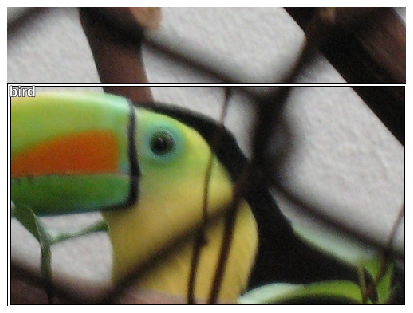

In [98]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [0]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [0]:

def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


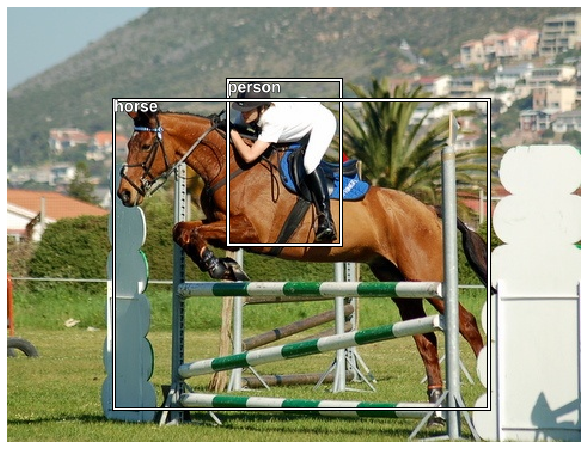

In [101]:
draw_idx(17)